# Random Forest Regressor

Mean Squared Error: 6.7355470419313335
R^2 Score: 0.9910034888592045


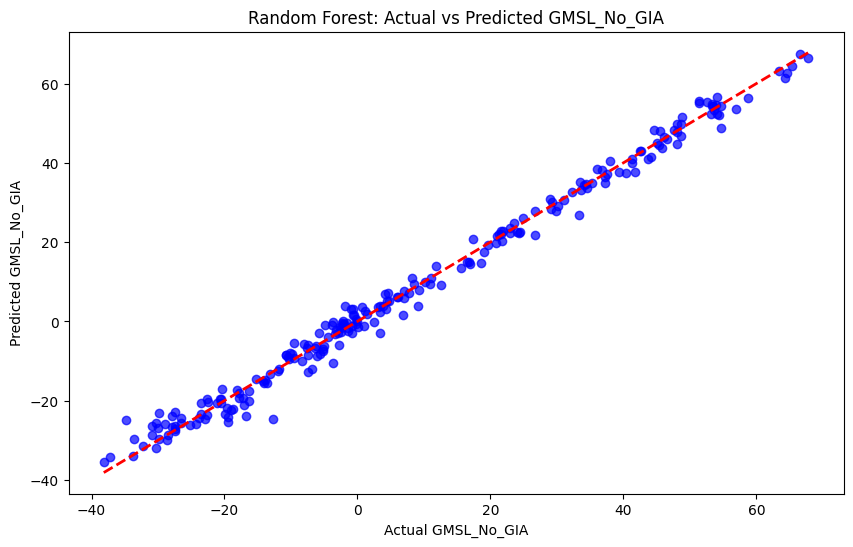

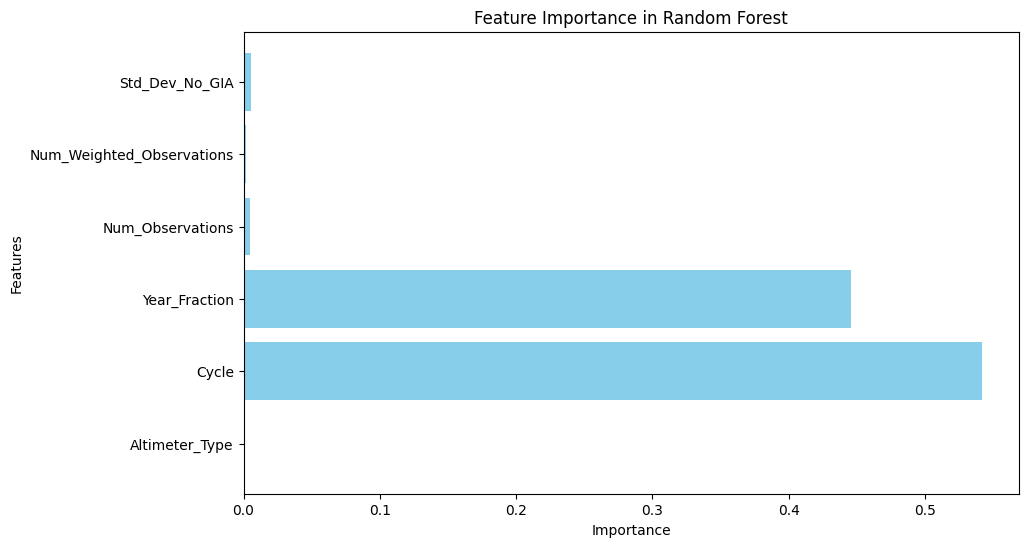

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_excel(file_path, header=0)
    data.columns = [
        'Altimeter_Type',
        'Cycle',
        'Year_Fraction',
        'Num_Observations',
        'Num_Weighted_Observations',
        'GMSL_No_GIA',
        'Std_Dev_No_GIA',
        'Smoothed_No_GIA',
        'GMSL_With_GIA',
        'Std_Dev_With_GIA',
        'Smoothed_With_GIA',
        'Smoothed_With_GIA_No_Annual',
        'Smoothed_No_GIA_No_Annual'
    ]
    return data

file_path = 'GMSL_TPJAOS_5.1.xlsx'
data = load_data(file_path)

label_encoder = LabelEncoder()

data['Altimeter_Type'] = label_encoder.fit_transform(data['Altimeter_Type'])

X = data[['Altimeter_Type', 'Cycle', 'Year_Fraction', 'Num_Observations', 'Num_Weighted_Observations', 'Std_Dev_No_GIA']]
y = data['GMSL_No_GIA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual GMSL_No_GIA')
plt.ylabel('Predicted GMSL_No_GIA')
plt.title('Random Forest: Actual vs Predicted GMSL_No_GIA')
plt.show()

importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

# Support Vector Regressor

In [3]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"Support Vector Regressor Mean Squared Error: {mse_svr}")

r2 = r2_score(y_test, y_pred_svr)
print(f"R^2 Score: {r2}")


Support Vector Regressor Mean Squared Error: 50.63410793167138
R^2 Score: 0.932369217633598


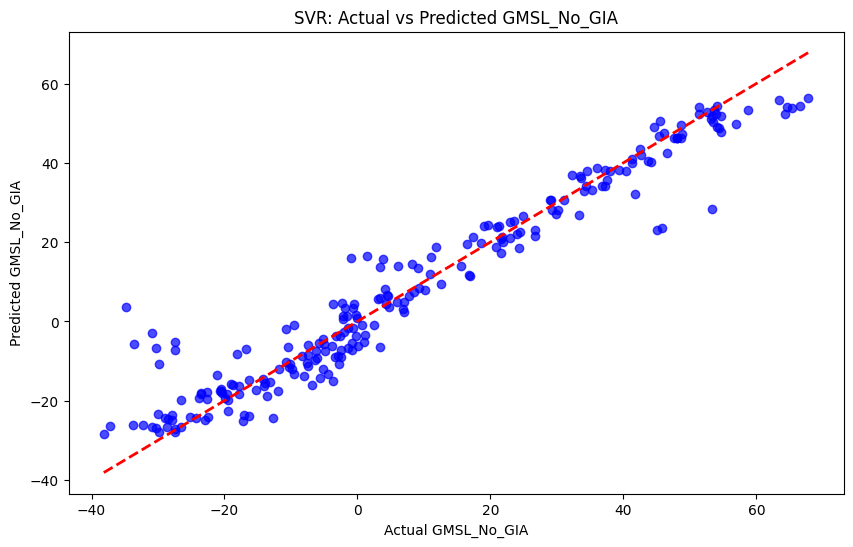

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual GMSL_No_GIA')
plt.ylabel('Predicted GMSL_No_GIA')
plt.title('SVR: Actual vs Predicted GMSL_No_GIA')
plt.show()


# Recurrent Neural Network

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
RNN Mean Squared Error: 27.217144859405888
R^2 Score: 0.9636467022761557


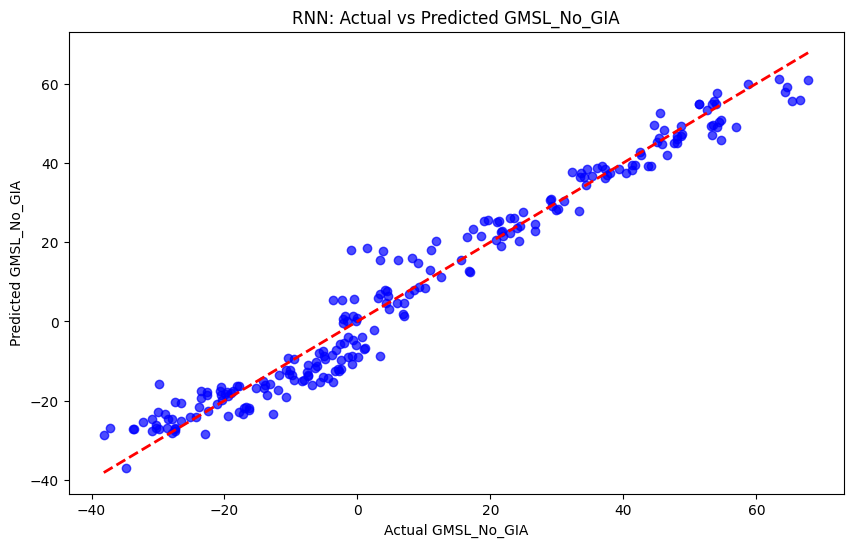

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_rnn = rnn_model.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f"RNN Mean Squared Error: {mse_rnn}")

r2 = r2_score(y_test, y_pred_rnn)
print(f"R^2 Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rnn, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual GMSL_No_GIA')
plt.ylabel('Predicted GMSL_No_GIA')
plt.title('RNN: Actual vs Predicted GMSL_No_GIA')
plt.show()


# Linear Regression

Linear Regression Mean Squared Error: 25.35591214863209
R^2 Score: 0.9661327068595768


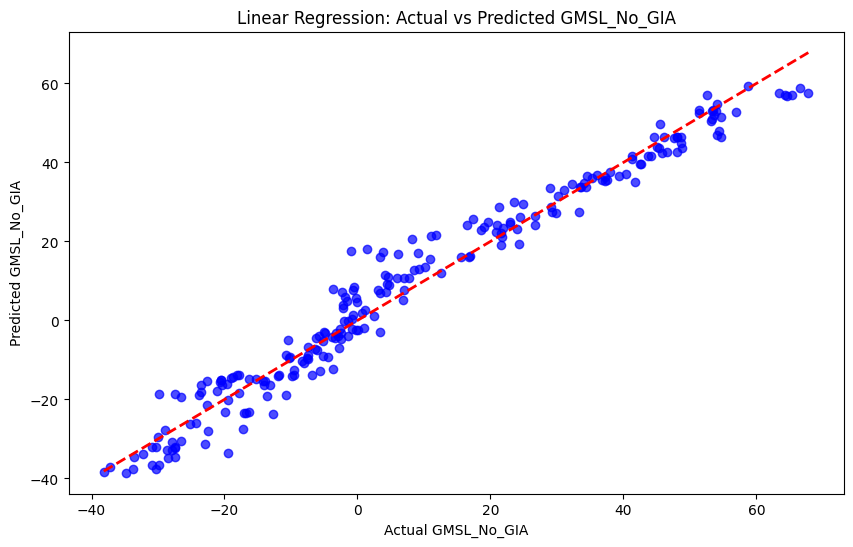

In [9]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")

r2 = r2_score(y_test, y_pred_lr)
print(f"R^2 Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual GMSL_No_GIA')
plt.ylabel('Predicted GMSL_No_GIA')
plt.title('Linear Regression: Actual vs Predicted GMSL_No_GIA')
plt.show()

# Multilayer Perceptron Regressor

MLP Regressor Mean Squared Error: 14.089028993737603
R^2 Score: 0.9811816166502779


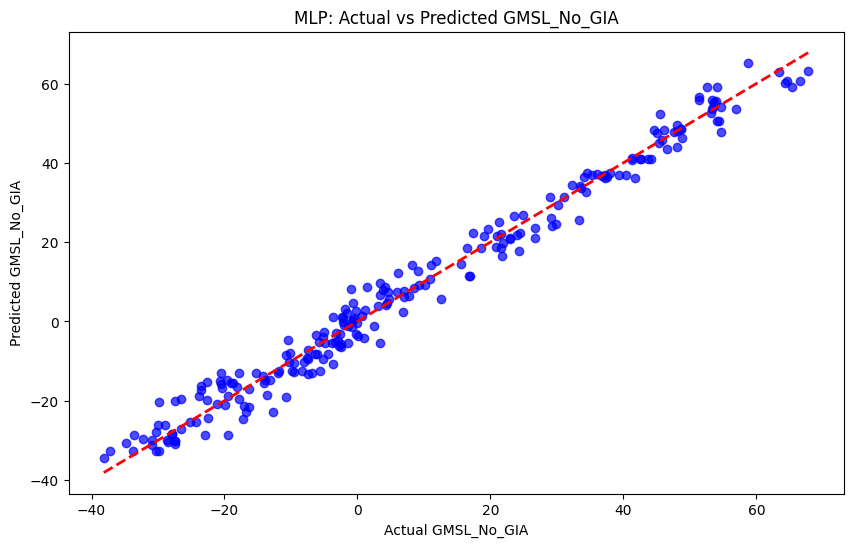

In [10]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLP Regressor Mean Squared Error: {mse_mlp}")

r2 = r2_score(y_test, y_pred_mlp)
print(f"R^2 Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual GMSL_No_GIA')
plt.ylabel('Predicted GMSL_No_GIA')
plt.title('MLP: Actual vs Predicted GMSL_No_GIA')
plt.show()

# Decision Tree

Decision Tree Mean Squared Error: 10.527273390557939
R^2 Score: 0.9859389695074867


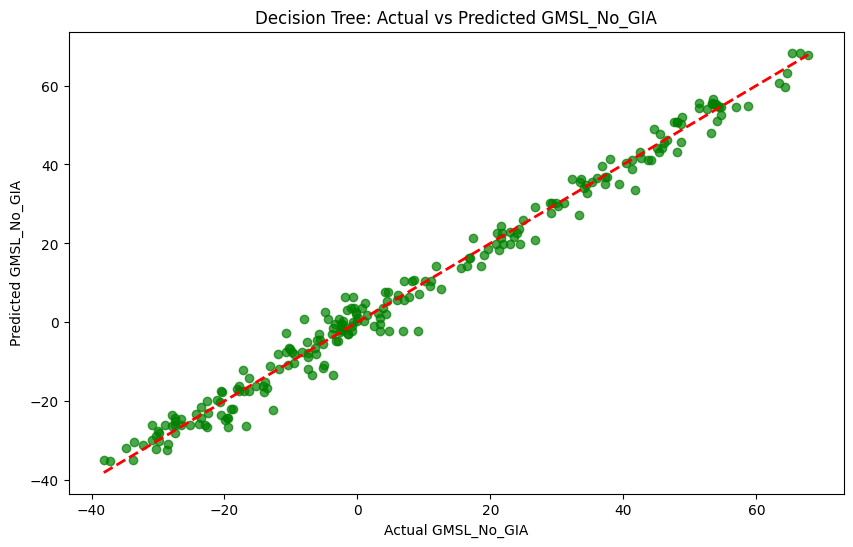

In [11]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")

r2 = r2_score(y_test, y_pred_dt)
print(f"R^2 Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual GMSL_No_GIA')
plt.ylabel('Predicted GMSL_No_GIA')
plt.title('Decision Tree: Actual vs Predicted GMSL_No_GIA')
plt.show()


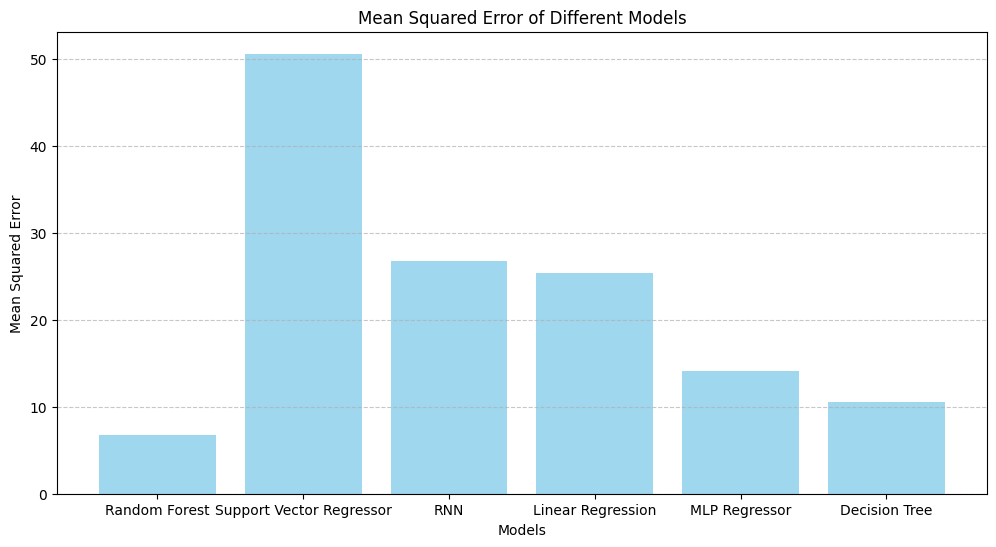

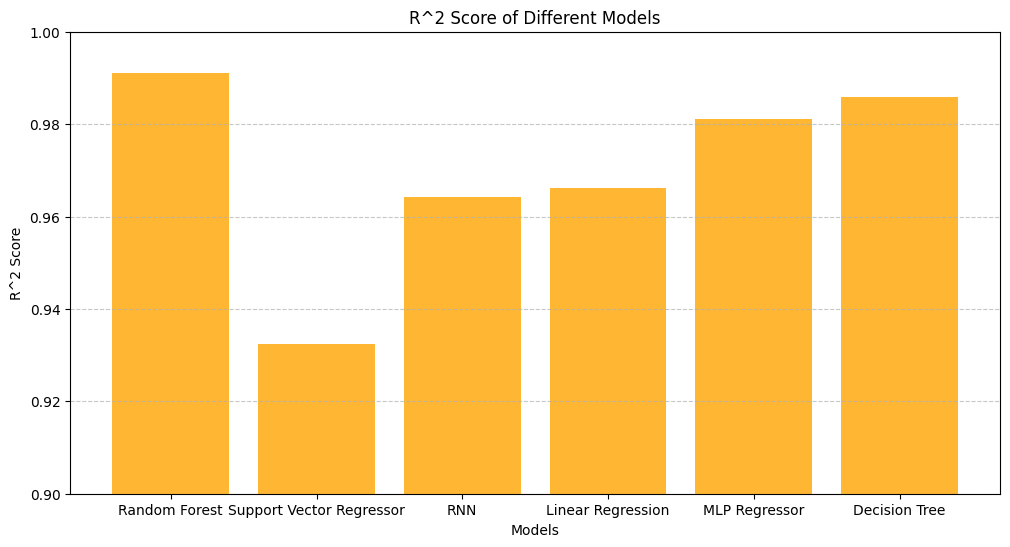

In [12]:
models = ['Random Forest', 'Support Vector Regressor', 'RNN', 'Linear Regression', 'MLP Regressor', 'Decision Tree']
mse_values = [6.7355470419313335, 50.63410793167138, 26.77088494931364, 25.35591214863209, 14.089028993737603, 10.527273390557939]
r2_values = [0.9910034888592045, 0.932369217633598, 0.9642427611007532, 0.9661327068595768, 0.9811816166502779, 0.9859389695074867]

plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color='skyblue', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, color='orange', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Score of Different Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.9, 1.0)
plt.show()
